<a href="https://colab.research.google.com/github/annie-lyu/word-embedding/blob/master/doc2vec_(with_pretrained_word_embeddings).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import glob
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
import gensim.models as g
import logging
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedLineDocument, TaggedDocument

In [3]:
##optimal hyperparameter setting found by Lau and Baldwin (2016) and confirmed by 
vector_size = 300
window_size = 15
min_count = 1
sampling_threshold = 1e-5
negative_size = 5
train_epoch = 100
dm = 0
worker_count = 1 

In [4]:
pretrained_emb = "/content/drive/My Drive/test/glove.6B.100d.txt"
saved_path = "/content/drive/My Drive/test/model.bin"
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [7]:
import re
def removePunctuation(text):
    punctuation = '\\\\!,;:?"\'.-=^/|+-'
    text = re.sub(r'[{}]+'.format(punctuation),'',text)
    text = text.replace("\n", "")
    return text

In [21]:
with open("/content/drive/My Drive/test/reddit.txt",encoding='latin-1') as f:
    data = f.read()
with open('/content/drive/My Drive/test/reddit_utf8.txt','w',encoding='utf8') as f:
    f.write(data)

docs = g.doc2vec.TaggedLineDocument('/content/drive/My Drive/test/reddit_utf8.txt')




In [22]:

model = g.Doc2Vec(docs, size=vector_size, window=window_size, min_count=min_count, sample=sampling_threshold, workers=worker_count, hs=0, dm=dm, negative=negative_size, dbow_words=1, dm_concat=1, pretrained_emb=pretrained_emb, iter=train_epoch)

#save model
model.save(saved_path)


/usr/local/lib/python3.6/dist-packages/gensim/models/doc2vec.py:566: UserWarning: The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.
  warnings.warn("The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.")
/usr/local/lib/python3.6/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
2020-08-04 03:47:03,067 : INFO : collecting all words and their counts
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2020-08-04 03:47:03,080 : I

In [24]:
    outp1 = "reddit_wv"
    outp2 = "reddit_pv"
    outp3 = "reddit_output"
    model.wv.save_word2vec_format(outp3) 

2020-08-04 05:01:22,540 : INFO : storing 80761x300 projection weights into reddit_output
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [28]:
import numpy
weight_array = model.wv.syn0
ind2word = model.wv.index2word


import pandas as pd
headers = ind2word
df = pd.DataFrame(weight_array, columns=headers, index=headers)
df.to_csv("reddit_mat.csv")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  


ValueError: ignored

In [36]:
##clustering with pyclustering
!pip3 install pyclustering
from pyclustering.cluster.kmeans import kmeans, kmeans_visualizer
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.samples.definitions import FCPS_SAMPLES
from pyclustering.utils import read_sample

# Load list of points for cluster analysis.
sample = read_sample(weight_array)

# Prepare initial centers using K-Means++ method.
initial_centers = kmeans_plusplus_initializer(sample, 10).initialize()

# Create instance of K-Means algorithm with prepared centers.
kmeans_instance = kmeans(sample, initial_centers)

# Run cluster analysis and obtain results.
kmeans_instance.process()
clusters = kmeans_instance.get_clusters()
final_centers = kmeans_instance.get_centers()

# Visualize obtained results
kmeans_visualizer.show_clusters(sample, clusters, final_centers)



     |████████████████████████████████| 2.6MB 2.7MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.9.3.1-cp36-none-any.whl size=2599356 sha256=36aa8dee42d154451d931f7cbd2e4213ace14cfc037e524ad0267e70b113a076
  Stored in directory: /root/.cache/pip/wheels/34/d6/ac/59746c226a35752edcd786d3ab96f9b547a2b70d0fbda92015
Successfully built pyclustering


TypeError: ignored

In [37]:
FCPS_SAMPLES.SAMPLE_TWO_DIAMONDS

'/usr/local/lib/python3.6/dist-packages/pyclustering/samples/samples/fcps/TwoDiamonds.data'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  


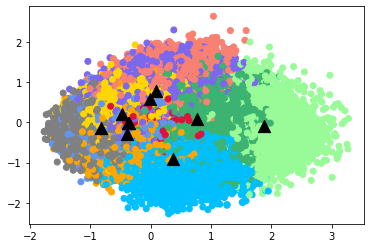

In [35]:
##clustering with sklearn package
import numpy
import numpy as np
import gensim
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from gensim.models import Doc2Vec

kmeans_model = KMeans(n_clusters=10, init='k-means++', max_iter=100) 
X = kmeans_model.fit(model.wv.syn0)
labels=kmeans_model.labels_.tolist()
l = kmeans_model.fit_predict(model.wv.syn0)
pca = PCA(n_components=2).fit(model.wv.syn0)
datapoint = pca.transform(model.wv.syn0)
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure
label1 = ["gray", "orange", "deepskyblue", "crimson", "cornflowerblue", 
          "mediumseagreen", "gold", "salmon", "palegreen", "mediumslateblue"]
color = [label1[i] for i in labels]
plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color)
centroids = kmeans_model.cluster_centers_
centroidpoint = pca.transform(centroids)
plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker="^", s=150, c="#000000")
plt.show()